# Housing Data

#### Alvee Hoque 06-11-2021

Exploring [Housing Data](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) from Kaggle

Tasks will include: 
1. Feature Engineering
2. XGBoost Model: Predict House Price of Test Set



### Imports

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
# pandas style
pd.set_option('display.max_columns',100)

# seaborn style
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})
sns.set_palette('bright')

In [3]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Quick Exploratory Data Analysis 

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


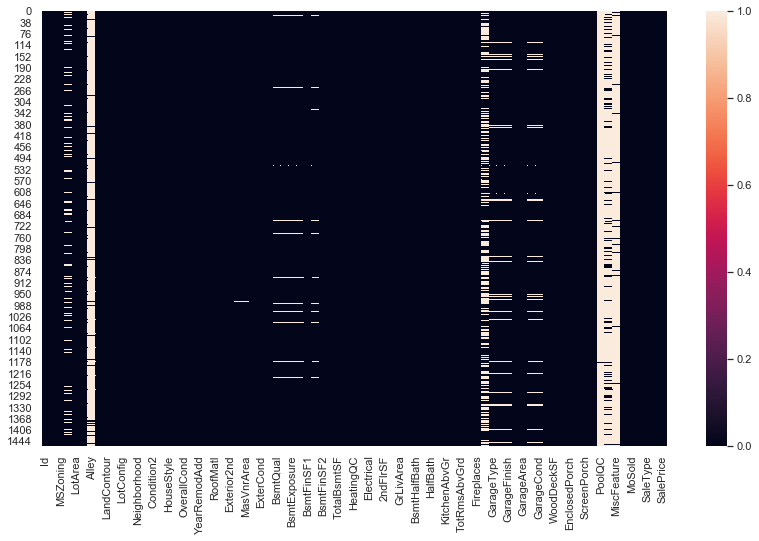

In [7]:
sns.heatmap(df.isnull())

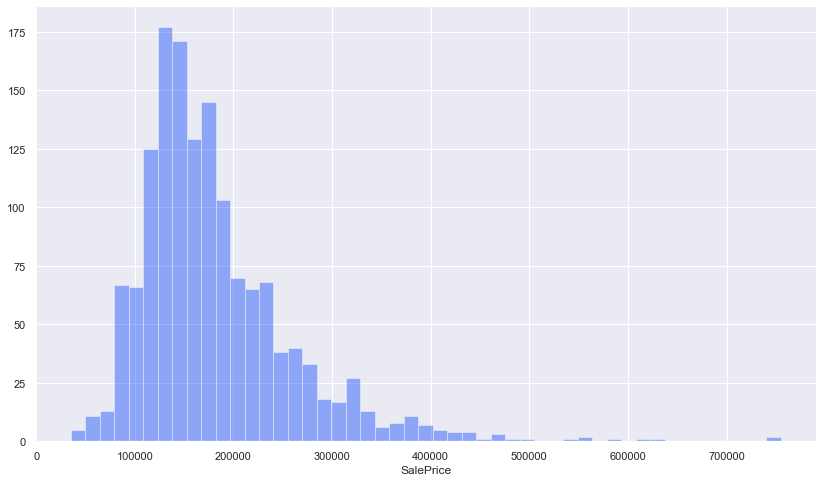

In [8]:
sns.distplot(df['SalePrice'],kde=False)

In [9]:
corr = df.corr()
corr['SalePrice']

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

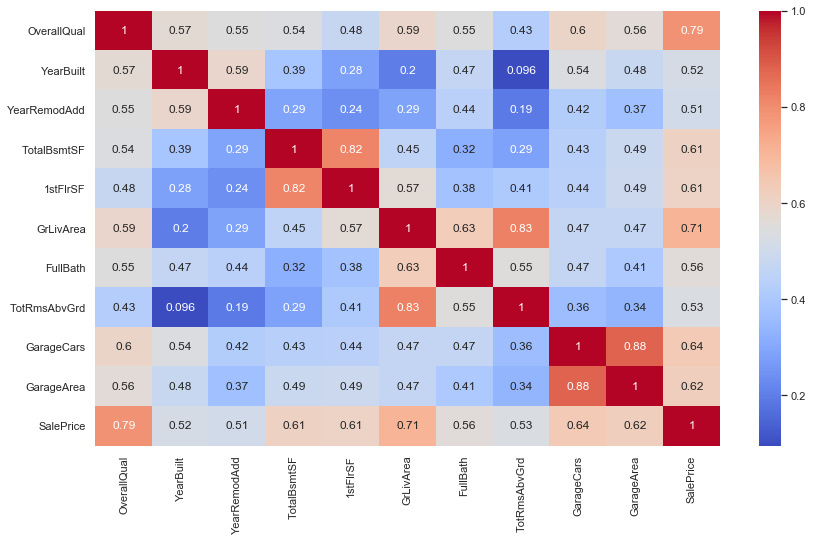

In [10]:
high_corr = corr.index[abs(corr['SalePrice']) > 0.5]
sns.heatmap(df[high_corr].corr(), annot=True, cmap='coolwarm')

#### Notes: 
- SalePrice is Right Skewed 


## Feature Engineering


Identify:
1. Missing Values
2. Skewed Distributions


### Missing Values - Train Set

In [11]:
# Get Percentage of Missing Values
null_data = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)

null_percent = pd.concat([null_data,percent],axis=1,keys=['Null Values','Percent'])
null_percent.head(20)

,Null Values,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [12]:
# Getting High Missing Values and starting a Drop List  
drop_col = null_percent[(null_percent['Percent'] > .45)].index.tolist()
# Dropping Above
df.drop(drop_col,axis=1,inplace=True)

In [13]:
df.isnull().sum().sort_values(ascending=False)

LotFrontage      259
GarageFinish      81
GarageType        81
GarageCond        81
GarageQual        81
                ... 
CentralAir         0
HeatingQC          0
Heating            0
SaleCondition      0
Id                 0
Length: 76, dtype: int64

In [14]:
# LotFrontage - Linear feet of street connected to property - filling in missing with 0
df['LotFrontage'].fillna(0,inplace=True)


# Garage Values - Fill in with Missing
garage_cat = ['GarageCond','GarageType','GarageFinish','GarageQual']
df[garage_cat] = df[garage_cat].fillna('Missing')

# Filling in garage yr blt with year built 
missing_yrs = df[df['GarageYrBlt'].isnull()].index.tolist()

for yr in missing_yrs:
    df['GarageYrBlt'].fillna(df['YearBuilt'].iloc[yr],inplace=True)
    
# Other Missing Vals
other_missing = ['BsmtFinType2', 'BsmtExposure','BsmtQual','BsmtFinType1','BsmtCond','MasVnrType']
df[other_missing] = df[other_missing].fillna('Missing')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

# SBrkr is most common, filling empty Electrical with that value 
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

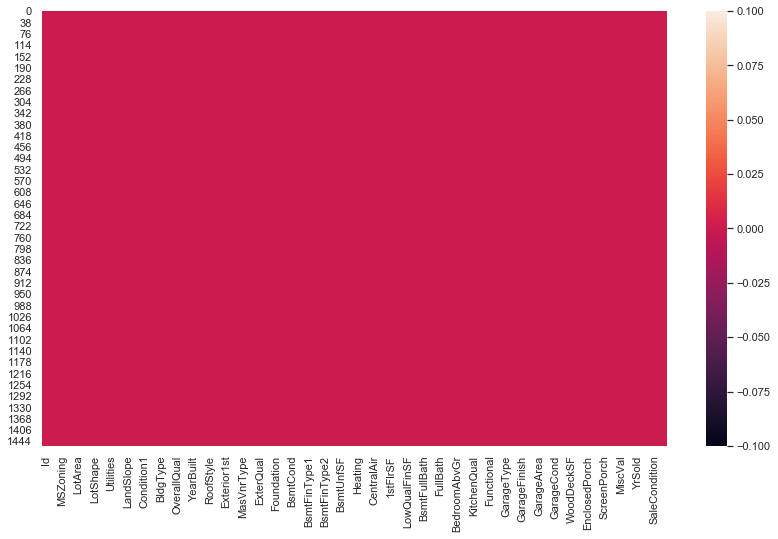

In [15]:
# Double Check for Null Values
sns.heatmap(df.isnull())

### Missing Values - Test Set

In [16]:
# CHECKING TEST DATA for SIMILARITY 

null_data_test = test.isnull().sum().sort_values(ascending=False)
percent_test = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)

null_percent_test = pd.concat([null_data_test,percent_test],axis=1,keys=['Null Values','Percent'])
drop_test = null_percent_test[(null_percent_test['Percent'] > .45)].index.tolist()
null_percent_test.head(20)

,Null Values,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461


In [17]:
# dropping same columns as train set, they happen to be same ones missing in both sets 
test.drop(drop_col,axis=1,inplace=True)

In [18]:
garage_cat = ['GarageCond','GarageType','GarageFinish','GarageQual']
test[garage_cat] = test[garage_cat].fillna('Missing')

# Filling in garage yr blt with year built 
missing_yrs = test[test['GarageYrBlt'].isnull()].index.tolist()

for yr in missing_yrs:
    test['GarageYrBlt'].fillna(test['YearBuilt'].iloc[yr],inplace=True)
    

# Other Missing Data
other_missing = ['BsmtFinType2', 'BsmtExposure','BsmtQual','BsmtFinType1','BsmtCond','MasVnrType']
test[other_missing] = test[other_missing].fillna('Missing')

test['MasVnrArea'] = test['MasVnrArea'].fillna(0)
test['LotFrontage'].fillna(0,inplace=True)
test['Utilities'].fillna(test.Utilities.mode()[0],inplace=True)
test['Functional'].fillna(test['Functional'].mode()[0],inplace=True)


# Test Set contained a few extra missing variables. Filling in with Missing or 0 
num_missing_test = ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
                    'BsmtFullBath','BsmtHalfBath','GarageArea','GarageCars']

cat_missing_test = ['Exterior1st','Exterior2nd','SaleType','MSZoning',
                    'Electrical','KitchenQual']


for col in cat_missing_test: 
    test[col] = test[col].fillna('Missing')
    
for col in num_missing_test:
    test[col] = test[col].fillna(0)


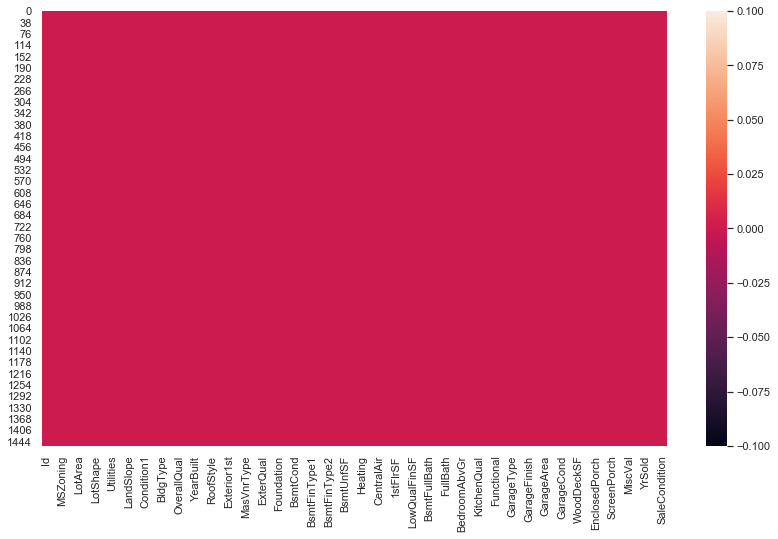

In [19]:
# Check Test Set for Null Values
sns.heatmap(test.isnull())

In [20]:
# Creating One Var for TotalSF instead of having individual floor SF 
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

test['TotalBsmtSF'] = pd.to_numeric(df['TotalBsmtSF'],downcast='float')
test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']


# Drop Cols 
df.drop(['TotalBsmtSF','1stFlrSF','2ndFlrSF'],axis=1,inplace=True)
test.drop(['TotalBsmtSF','1stFlrSF','2ndFlrSF'],axis=1,inplace=True)

### Skewed Data

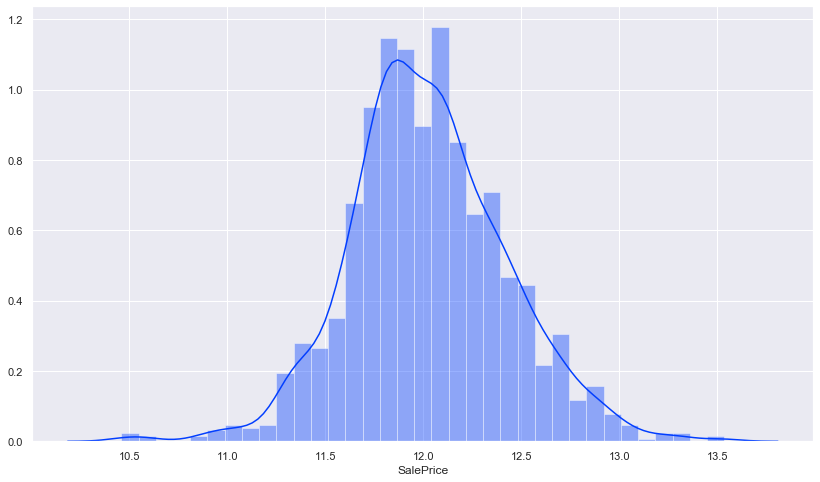

In [21]:
# Log Transform SalePrice
sns.distplot(np.log(df['SalePrice']))

# df['logSalePrice'] = np.log(df['SalePrice'])

In [23]:
from scipy.stats import skew

In [24]:
num_var = df.dtypes[df.dtypes !='O'].index
skew_var = df[num_var].apply(lambda x: skew(x))
high_skew = skew_var[abs(skew_var) > 1]
print(high_skew)

MSSubClass        1.406210
LotArea          12.195142
MasVnrArea        2.674865
BsmtFinSF1        1.683771
BsmtFinSF2        4.250888
LowQualFinSF      9.002080
GrLivArea         1.365156
BsmtHalfBath      4.099186
KitchenAbvGr      4.483784
WoodDeckSF        1.539792
OpenPorchSF       2.361912
EnclosedPorch     3.086696
3SsnPorch        10.293752
ScreenPorch       4.117977
PoolArea         14.813135
MiscVal          24.451640
SalePrice         1.880941
TotalSF           1.774874
dtype: float64


In [25]:
num_var_test = test.dtypes[test.dtypes !='O'].index
skew_var_test = test[num_var_test].apply(lambda x: skew(x))
high_skew_test = skew_var_test[abs(skew_var_test) > 1]
print(high_skew_test)

MSSubClass        1.345305
LotArea           3.112013
MasVnrArea        2.546947
BsmtFinSF1        1.165130
BsmtFinSF2        4.038796
LowQualFinSF     16.150628
GrLivArea         1.129240
BsmtHalfBath      3.779085
KitchenAbvGr      4.074860
WoodDeckSF        2.128569
OpenPorchSF       2.685015
EnclosedPorch     4.664371
3SsnPorch        12.511336
ScreenPorch       3.784349
PoolArea         20.176117
MiscVal          20.054543
dtype: float64


In [26]:
# Log transform high skew columns. USING log1p because of 0's in data 

for col in high_skew.index:
    df[col] = np.log1p(df[col])
    
for col in high_skew_test.index:
    test[col] = np.log1p(test[col])

### PreProcessing 

Ensuring columns match and are in both training and test set

In [27]:
y = df['SalePrice']
test_id = test.Id

all_data = pd.concat([df,test], axis=0)
all_data = pd.get_dummies(all_data)
all_data.drop(['Id','SalePrice'], axis=1, inplace=True)

In [28]:
X = all_data[:len(y)]
test = all_data[len(y):]


## Training Model 

In [33]:
# imports 
import xgboost as XGB

from sklearn import preprocessing
from sklearn.model_selection import train_test_split


from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

In [34]:
from sklearn.model_selection import GridSearchCV


In [30]:
# X = pd.get_dummies(df)
# X.drop(['Id','SalePrice'],axis=1, inplace=True)
# X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalSF,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,...,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Missing,GarageFinish_Fin,GarageFinish_Missing,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Missing,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Missing,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,65.0,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,150,0.0,7.444833,1,0.000000,2,1,3,0.693147,8,0,2003.0,2,548,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.0,2,2008,7.850493,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,...,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,3.044522,80.0,9.169623,6,8,1976,1976,0.000000,6.886532,0.0,284,0.0,7.141245,0,0.693147,2,0,3,0.693147,6,1,1976.0,2,460,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.0,5,2007,7.833996,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,4.110874,68.0,9.328212,7,5,2001,2002,5.093750,6.188264,0.0,434,0.0,7.488294,1,0.000000,2,1,3,0.693147,6,1,2001.0,2,608,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.0,9,2008,7.903596,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4.262680,60.0,9.164401,7,5,1915,1970,0.000000,5.379897,0.0,540,0.0,7.448916,1,0.000000,1,0,3,0.693147,7,1,1998.0,3,642,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.0,2,2006,7.813592,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,4.110874,84.0,9.565284,8,5,2000,2000,5.860786,6.486161,0.0,490,0.0,7.695758,1,0.000000,2,1,4,0.693147,9,1,2000.0,3,836,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.0,12,2008,8.114923,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 283)
(292, 283)
(1168,)
(292,)


In [38]:
xg_grid_reg = XGB.XGBRegressor()

In [39]:
# Grid Search Parameters
grid_search_params = {
    'colsample_bytree': [0.2, 0.3, 0.4],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [500, 1000, 2000],
    'subsample': [0.2, 0.5, 0.8],
    'max_depth': [2, 3, 5]
}

In [42]:
grid = GridSearchCV(estimator=xg_grid_reg, param_grid=grid_search_params, 
                    scoring='neg_mean_squared_error', cv=5, verbose=1)

In [43]:
grid.fit(X,y) 

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed: 12.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estima...
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.2, 0.3, 0.4],
                         'learning_ra

In [44]:
print("Best parameters found: ", grid.best_params_)


Best parameters found:  {'colsample_bytree': 0.2, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 2000, 'subsample': 0.5}


In [ ]:
# Best Params:'colsample_bytree': 0.2, 
# 'learning_rate': 0.01, 'max_depth': 5, 
# 'n_estimators': 2000, 'subsample': 0.5

In [45]:
print("Lowest RMSE found: ", np.sqrt(np.abs(grid.best_score_)))


Lowest RMSE found:  0.11766294801112379


In [51]:
xgb_regressor = XGB.XGBRegressor(colsample_bytree = 0.2, learning_rate=0.01,
                                max_depth = 5, n_estimators=2000, subsample = 0.8)

In [52]:
xgb_regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.2, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=2000, n_jobs=16, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
preds = xgb_regressor.predict(X_test)

In [54]:
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test,preds)))

RMSE: 0.120987


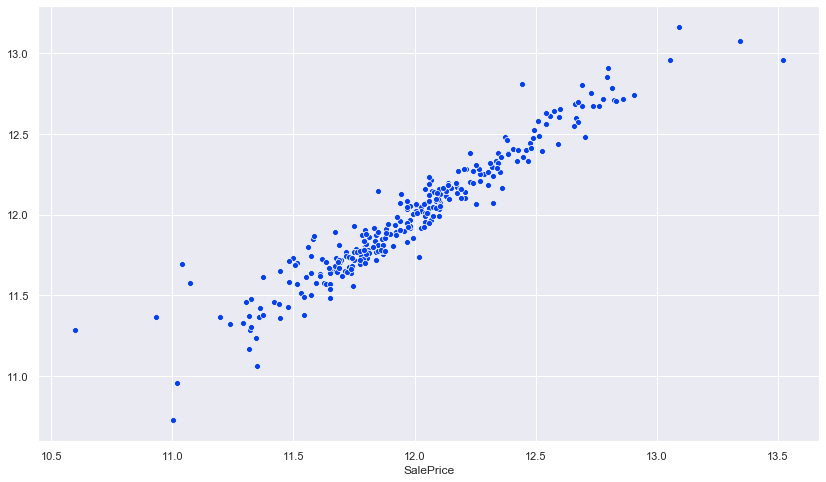

In [55]:
sns.scatterplot(y_test,preds)

In [56]:
# Retraining Whole Training Set and Applying to Test Set for submission: 
xgb_regressor = XGB.XGBRegressor(colsample_bytree = 0.2, learning_rate=0.01,
                                max_depth = 5, n_estimators=2000, subsample = 0.5)


In [57]:
xgb_regressor.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.2, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=2000, n_jobs=16, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
pred = xgb_regressor.predict(test)

In [ ]:
test_pred = np.floor(np.expm1(xgb_regressor.predict(test)))

In [64]:
sub = pd.DataFrame(columns=['Id','SalePrice'])
sub['Id'] = test_id
sub['SalePrice'] = test_pred
sub.to_csv('submission.csv',index=False)

#### Note
This submission got a poor score of .20. Will individually go through variables to change them next time. 